In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
# viz libs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from pathlib import Path
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
warnings.filterwarnings('ignore', category=FutureWarning) 
warnings.filterwarnings('ignore', category=UserWarning)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
corpus_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project\CORPUS')
data_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project\Data')
filename="newsApiData.csv"
nytimes_data =  "fav_sneaker_data.txt"
nike_vs_adidas_data =  "nike_vs_adidas_data.txt"
nike_reviews_data = "nike_reviews_data.csv"
twitter_data = "twitter_data.csv"
filtered_twitter_data = "filtered_twitter_data.csv"

In [13]:
def lemmatization(text):
    word_net_lemmatizer = WordNetLemmatizer()
    words = str(text).split()
    words = [word_net_lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

def stemming_words(text):
    porter_stemmer = PorterStemmer()
    words = str(text).split()
    words = [porter_stemmer.stem(word) for word in words]
    return ' '.join(words)

In [14]:
review_path = data_path.joinpath(nike_reviews_data)
reviews_df = pd.read_csv("../content/sample_data/nike_adidas_reviews_data.csv", error_bad_lines=False,encoding="utf-8")
reviews_df['Review'] = reviews_df['Review'].apply(lemmatization)
reviews_df['Review'] = reviews_df['Review'].apply(stemming_words)

In [53]:
MyCountV=CountVectorizer(
        input="content",  ## because we have a csv file
        lowercase = True,
        token_pattern = r'\b[a-zA-Z]{3,}\b', 
        stop_words = "english",
        max_features=100
        )

## Use your CV 
MyDTM = MyCountV.fit_transform(reviews_df['Review'])  # create a sparse matrix
ColumnNames=MyCountV.get_feature_names_out()

## Build the data frame
MyDTM_DF=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

In [58]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df = 0.05, max_df=0.95,
                             lowercase = True,
        token_pattern = r'\b[a-zA-Z]{4,}\b', 
        stop_words = "english" )
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(reviews_df['Review'])
ColumnNames=vectorizer.get_feature_names_out()

## Build the data frame
Mytfid_DF=pd.DataFrame(X.toarray(),columns=ColumnNames)
Mytfid_DF


,absolut,adida,anoth,anyth,arriv,bought,brand,cancel,card,chat,...,track,trainer,wait,want,websit,week,work,worst,wrong,year
0,0.000000,0.000000,0.0,0.0,0.259256,0.272269,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.266805,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.358114,0.0,0.375303,0.0,...,0.0,0.173933,0.00000,0.0,0.000000,0.162718,0.0,0.0,0.000000,0.223269
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.495161,0.000000
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.24077,0.0,0.284798,0.000000,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.349635,0.0,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.000000,0.360455,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
636,0.354109,0.000000,0.0,0.0,0.000000,0.344730,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
637,0.000000,0.254932,0.0,0.0,0.000000,0.378476,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
638,0.000000,0.267659,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [49]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

# initialize kmeans with 4 centroids
kmeans4 = KMeans(n_clusters=4, random_state=42)
# fit the model
kmeans4.fit(X)
# store cluster labels in a variable
clusters4 = kmeans4.labels_

# initialize kmeans with 2 centroids
kmeans2 = KMeans(n_clusters=2, random_state=42)
# fit the model
kmeans2.fit(X)
# store cluster labels in a variable
clusters2 = kmeans2.labels_


In [36]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [47]:
reviews_df['cluster3'] = clusters
reviews_df['cluster4'] = clusters4
reviews_df['cluster2'] = clusters2
reviews_df['x0'] = x0
reviews_df['x1'] = x1


Cluster 0
wait,nike,receiv,return,item,compani,refund,servic,custom,order

Cluster 1
month,time,adida,bought,qualiti,like,order,pair,nike,shoe

Cluster 2
time,pair,purchas,servic,deliveri,trainer,qualiti,product,nike,adida


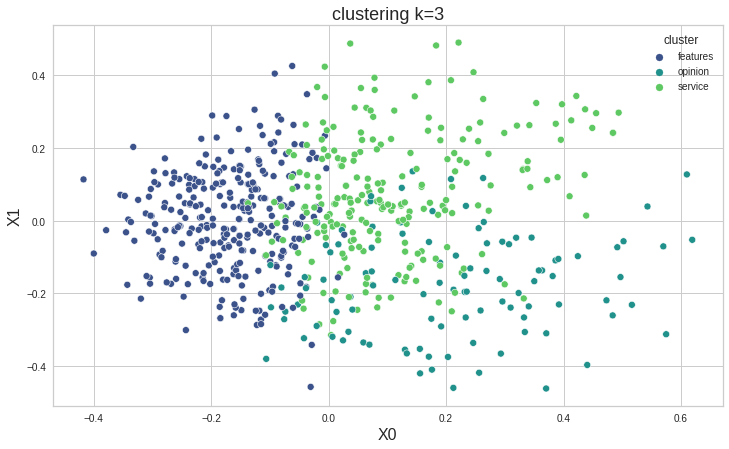

In [56]:
def get_top_keywords(n_terms,clusters):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10,clusters)

# map clusters to appropriate labels 
cluster_map = {0: "features", 1: "opinion", 2: "service"}
# apply mapping
reviews_df['cluster'] = reviews_df['cluster'].map(cluster_map)

# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("clustering k=3", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=reviews_df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

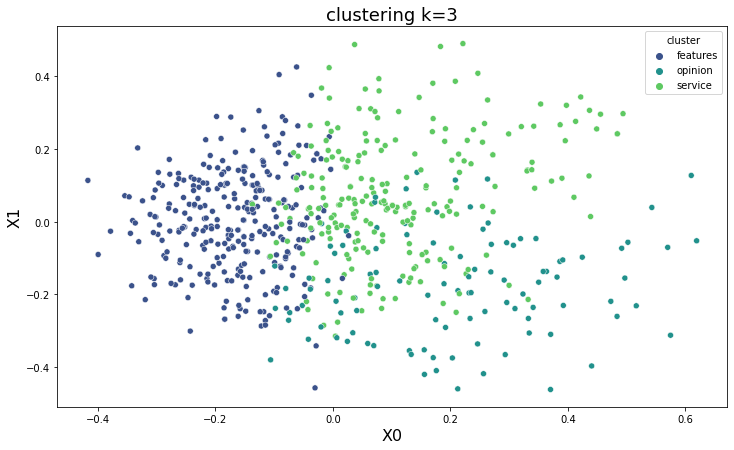


Cluster 0
great,time,adida,order,like,bought,qualiti,nike,pair,shoe

Cluster 1
deliv,time,cancel,place,deliveri,item,custom,nike,servic,order

Cluster 2
compani,wait,order,item,exchang,servic,custom,receiv,refund,return

Cluster 3
poor,compani,trainer,purchas,nike,custom,servic,qualiti,product,adida


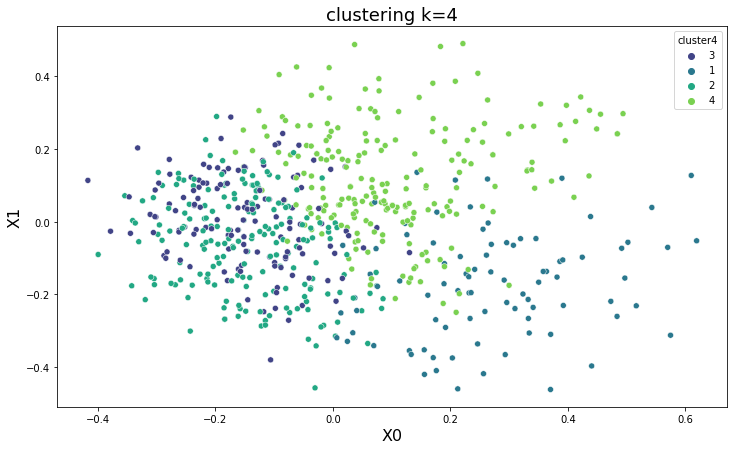

In [45]:
"""This function returns the keywords for each centroid of the KMeans"""
df4 = pd.DataFrame(X.todense()).groupby(clusters4).mean() # groups the TF-IDF vector by cluster
terms4 = vectorizer.get_feature_names_out() # access tf-idf terms
for i,r in df4.iterrows():
    print('\nCluster {}'.format(i))
    print(','.join([terms4[t] for t in np.argsort(r)[-10:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

# map clusters to appropriate labels 
cluster_map = {0: "1", 1: "2", 2: "3", 3: "4"}
# apply mapping
reviews_df['cluster4'] = reviews_df['cluster4'].map(cluster_map)

# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("clustering k=4", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=reviews_df, x='x0', y='x1', hue='cluster4', palette="viridis")
plt.show()



Cluster 0
purchas,like,trainer,bought,pair,product,adida,nike,qualiti,shoe

Cluster 1
time,compani,receiv,item,return,nike,refund,servic,custom,order


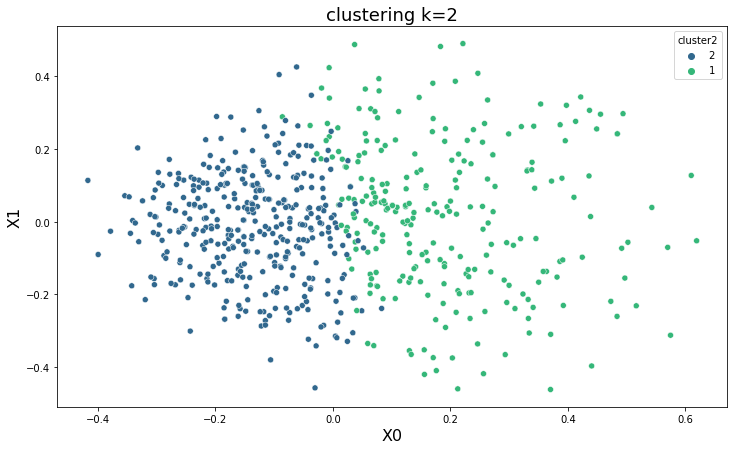

In [48]:
"""This function returns the keywords for each centroid of the KMeans"""
df2 = pd.DataFrame(X.todense()).groupby(clusters2).mean() # groups the TF-IDF vector by cluster
terms4 = vectorizer.get_feature_names_out() # access tf-idf terms
for i,r in df2.iterrows():
    print('\nCluster {}'.format(i))
    print(','.join([terms4[t] for t in np.argsort(r)[-10:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

# map clusters to appropriate labels 
cluster_map = {0: "1", 1: "2"}
# apply mapping
reviews_df['cluster2'] = reviews_df['cluster2'].map(cluster_map)

# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("clustering k=2", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=reviews_df, x='x0', y='x1', hue='cluster2', palette="viridis")
plt.show()

In [54]:
My_Orig_DF = MyDTM_DF
#My_KMean= KMeans(n_clusters=3)
#My_KMean.fit(My_Orig_DF)
My_labels=kmeans.predict(X)

# initialize kmeans with 3 centroids
#kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
#kmeans.fit(X)
# store cluster labels in a variable
#clusters = kmeans.labels_
print("Silhouette Score for k = 3 \n",silhouette_score(My_Orig_DF, My_labels))

#cosdist = 1 - cosine_similarity(MyDTM)
#print(cosdist)
#print(np.round(cosdist,3))  #cos dist should be .02


Silhouette Score for k = 3 
 0.0015413132609125636


In [ ]:
#sns.scatterplot(My_Orig_DF.iloc[0],My_Orig_DF.iloc[1], hue=My_labels)

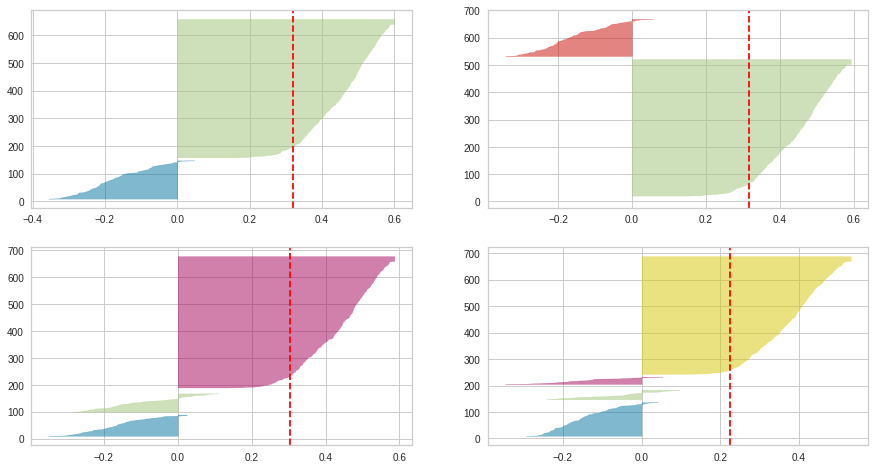

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2,2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(My_Orig_DF)

In [ ]:
#pip install yellowbrick